In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
from abc import ABC, abstractmethod

In [2]:
class Tree:
    def __init__(self, root):
        self.root = root
        self.labels = []
        root.setTree(self)
        self.generate(root)

    @abstractmethod
    def generate(self, node):
        pass
    
    def addLabel(self, label: int):
        self.labels.append(label)

class Node:
    TEAL = "#008080"
    GOLD = "#ffd700"
    PURPLE = "#800080"

    colors = [TEAL, GOLD, PURPLE]
    columns = []

    def __init__(self, label):
        self.tree = None
        self.predecessor = None
        self.successors = []
        self.row = 0
        self.label = label
        self.col = 0

    def addSuccessor(self, successor):
        successor.row = self.row + 1
        if self.tree is not None and not successor.label in self.tree.labels:
            successor.setTree(self.tree)
            successor.predecessor = self
            self.successors.append(successor)
    
    def setTree(self, tree: Tree):
        self.tree = tree
        self.tree.addLabel(self.label)

    def getType(label):
        if (label + 1) % 3 == 0:
            return 1
        elif label % 3 == 0:
            return 2
        elif (label - 1) % 3 == 0:
            return 3
        return -1


    def setPosition(self, pos):
        self.col = pos

        return

#    def setPosition(self):
#        #col_position
#        for i in range(len(self.columns),0):
#            for j in columns[i]:
#                if j == int(self.label):
#                    self.col = i
#
#        return -1




class DataFrameGenerator:
    @staticmethod
    def generateGraphData(node : Node, horizontal_flip = False, predecessor_successor_array = []) -> list:
        successors = node.successors[::-1] if horizontal_flip else node.successors
        for successor in successors:
            predecessor_successor_array.append([node.label, successor.label])
            DataFrameGenerator.generateGraphData(successor, horizontal_flip, predecessor_successor_array)
        return predecessor_successor_array

    @staticmethod
    def generateDataFrame(node : Node, horizontal_flip = False) -> pd.DataFrame: 
        columns = ['predecessorId', 'successorId']
        df = pd.DataFrame(columns = columns, data=DataFrameGenerator.generateGraphData(node, horizontal_flip, []))
        df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
        df[['predecessorId', 'successorId']] = df[['predecessorId', 'successorId']].astype('int')
        return df

##############################

#Aberkane Tree
class AberkaneTree(Tree):
    def __init__(self, root: Node, height: int):
        self.height = height   
        super().__init__(root)   


    def generate(self, node: Node):
        
        if node.row == 0:
            middle_child = Node(node.label * 2 + 1)
            node.addSuccessor(middle_child)
            self.generate(middle_child)

        elif node.row < self.height:
           
            #middle_child = Node(node.label * 4 + 1)
            right_child = Node(node.label * 2 + 1)
            left_child = Node(node.label * 2 - 1)

            node.addSuccessor(right_child)
            #node.addSuccessor(middle_child)
            node.addSuccessor(left_child)

            self.generate(right_child)
            #self.generate(middle_child)
            self.generate(left_child)
    
    def genColCluster(tree_height):
        
        col_arr = []
        big_leaf = int(1)
        used_nodes = []

        for i in range(1,aberkane_height):
            big_leaf = int(big_leaf * 2 + 1) 

        len_high_row = 2 ** (aberkane_height - 2)

        #counter = num_col
        while big_leaf > len_high_row: #0:
            is_part = False
            col_build = []

        #   num_col = num_col - 1
            col_high = int(big_leaf)
        #    used_nodes.append(int((big_leaf-1)/4))
            
            for i in used_nodes:
                if big_leaf == i:
                    is_part = True
            
            if is_part == False:
                used_nodes.append(int(big_leaf))
                col_build.append(int(big_leaf))

                while (col_high-1)%4 == 0:
                    test_node = (col_high-1)/4

                    if (test_node)%2 == 0:
                        col_high = 0
                    else:
                        col_build.append(int((col_high-1)/4))
                        used_nodes.append(int((col_high-1)/4))
                        col_high = int((col_high-1)/4)
                    if col_high == 0:
                        break
                big_leaf = big_leaf-2
                col_build.sort()
                col_arr.append(col_build)
            else:
                big_leaf = big_leaf-2
        col_arr.sort()
        Node.columns = col_arr

#try to get right order

#        for i in col_arr:
#            right = i * 2 + 1
#            left = i * 2 - 1

    







In [3]:
def func_V(n):
    return 4 * n + 1

def func_S(n):
    return 2 * n + 1

def func_G(n):
    return 2 * n - 1

[[1, 5], [3, 13], [7], [9], [11], [15]]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
[[1, 5], [3, 13], [7], [9], [11], [15]]


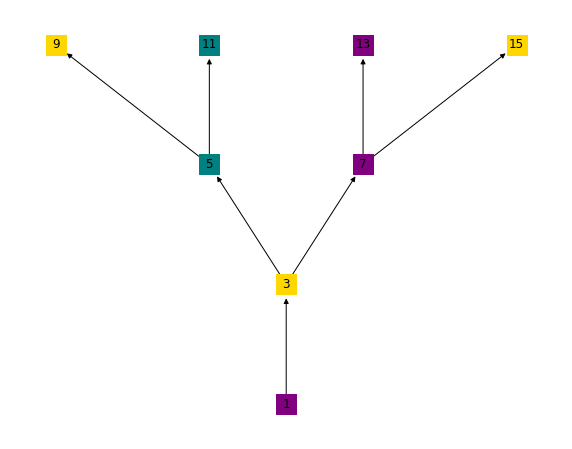

In [4]:
##Top down

aberkane_height = 4

AberkaneTree.genColCluster(aberkane_height)
root = Node(1)
#root.setPosition()
aberkane_tree = AberkaneTree(root, aberkane_height-1)
print(root.columns)
test = root.label
test2 = len(root.columns[1])

col_counter = 0
len_col_i = 0
len_columns = len(root.columns)

for i in range(len_columns, 0, -1):
    len_col_i = len(root.columns[i-1])
    col_counter = col_counter + 1
    for j in range(0, len_col_i):
        
        if root.columns[i-1][j] == int(root.label):
            root.setPosition(col_counter)
            
    
    

print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print(root.columns)
#print(test2)
#aberkane_tree.col_cluster = aberkane_tree.setColumnCluster

df = DataFrameGenerator.generateDataFrame(aberkane_tree.root, True)
G = nx.from_pandas_edgelist(df, 'predecessorId', 'successorId', create_using=nx.DiGraph)
node_colors = []
for node in G:
    color_type = Node.getType(node)
    node_colors.append(Node.colors[color_type-1])
pos = graphviz_layout(G, prog="dot", root=1, args='-Gsplines=true -Gsep=1 -Goverlap=false -Gorientation=10')
plt.figure(figsize=(10, 8))
plt.gca().invert_yaxis()
#nx.draw(G, pos=pos, with_labels=True,  node_shape="s", node_size=400, linewidths=10)
nx.draw(G, node_color=node_colors, pos=pos, with_labels=True,  node_shape="s", node_size=400, linewidths=1)

In [5]:
##bottom up
aberkane_height = 5

col_arr = []
big_leaf = int(1)
used_nodes = []

for i in range(1,aberkane_height):
    big_leaf = int(big_leaf * 2 + 1) 

#total_noeds = int((big_leaf + 1)/2)
#len_high_row = 2 ** (aberkane_height - 2)

#counter = num_col
#while big_leaf > len_high_row: #0:
for j in range(1,big_leaf+1, 2):
    is_part = False
    col_build = []

#   num_col = num_col - 1
#    col_high = int(big_leaf)
#    used_nodes.append(int((big_leaf-1)/4))
    
    for x in used_nodes:
        if j == x:
            is_part = True
    
    if is_part == False:
        used_nodes.append(int(j))
        col_build.append(int(j))

        test_node = j*4+1

        #while (col_high-1)%4 == 0:
        while(test_node < big_leaf):
            test_node_is_part = False




            for y in used_nodes:
                if test_node == y:
                    test_node_is_part = True
                    test_node = big_leaf+1
            
            if test_node_is_part == False:

                col_build.append(int(test_node))
                used_nodes.append(int(test_node))
                test_node = test_node * 4 + 1


        col_arr.append(col_build)

Node.columns = col_arr

print(root.columns)





[[1, 5, 21], [3, 13], [7, 29], [9], [11], [15], [17], [19], [23], [25], [27], [31]]


In [6]:
            
            

############################################################# try to set right order



aberkane_height = 7

col_arr = []
big_leaf = int(1)
used_nodes = []
col_position = 0
is_right = False
is_left = False
right_node = 0
left_node = 0

for i in range(1,aberkane_height):
    big_leaf = int(big_leaf * 2 + 1) 

#total_noeds = int((big_leaf + 1)/2)
#len_high_row = 2 ** (aberkane_height - 2)

#counter = num_col
#while big_leaf > len_high_row: #0:
for j in range(1,big_leaf+1, 2):
    is_part = False
    col_build = []

#   num_col = num_col - 1
#    col_high = int(big_leaf)
#    used_nodes.append(int((big_leaf-1)/4))
    
    for x in used_nodes:
        if j == x:
            is_part = True
    
    if is_part == False:
        used_nodes.append(int(j))
        col_build.append(int(j))
#################################################


        right_node = int((j-1)/2)
        left_node = int((j+1)/2)
            
        is_right = False
        is_left = False



        for a in used_nodes:      
            if j == 1:
                is_right = True
                is_left = True
            elif a == int(right_node):
                is_right = True
            elif a == int(left_node):
                is_left = True
                    

                
                    


###############################################
        test_node = j*4+1
        #while (col_high-1)%4 == 0:
        while(test_node < big_leaf):
            test_node_is_part = False

            for y in used_nodes:
                if test_node == y:
                    test_node_is_part = True
                    test_node = big_leaf+1
            
            if test_node_is_part == False:

                col_build.append(int(test_node))
                used_nodes.append(int(test_node))
                test_node = test_node * 4 + 1

######################################################

        col_position
        len_col_i = 0
        len_columns = len(col_arr)

        for i in range(0,len_columns):
            len_col_i = len(col_arr[i])
            #col_counter = col_counter + 1
            for j in range(0, len_col_i):
            
                if col_arr[i][j] == left_node or col_arr[i][j] == right_node:
                    col_position = i 





        if is_left == True and is_right == True:
            col_arr.append(col_build)
        elif is_left == True:
            if col_position == 0:
                col_arr.insert(col_position, col_build)
            else:
                col_arr.insert(col_position, col_build)
        elif is_right == True:
            col_arr.insert(col_position+1, col_build)
        
        
        
        #col_arr.insert
        

Node.columns = col_arr

print(root.columns)

[[65], [33], [67], [17, 69], [35], [71], [73], [9, 37], [75], [19, 77], [39], [79], [81], [41], [83], [1, 5, 21, 85], [43], [87], [89], [11, 45], [91], [23, 93], [47], [95], [97], [49], [99], [25, 101], [51], [103], [105], [3, 13, 53], [107], [27, 109], [55], [111], [113], [57], [115], [7, 29, 117], [59], [119], [121], [15, 61], [123], [31, 125], [63], [127]]
